# **Lab 5**: Naive Bayes Classification and Feature Selection

In this lab you will practice machine learning (surprise!), specifically experimenting with Naive Bayes Classifiers, and performing feature selection.

You will also continue to practice programming in python, which you should now be quite comfortable doing.

To pass this lab you must complete all parts marked with a "*". You can do more parts, of course, because in the end that will help you on your project!

*HINT: See code that we have presented in class.*

This lab is based on this dataset: https://archive.ics.uci.edu/ml/datasets/adult. The following code loads in the training and testing data and appropriately labels the columns.


In [8]:
columnNames = ['age','workclass','fnlwgt','education','education_num',
                                'marital-status','occupation','relationship',
                                'race','sex','capital-gain','capital-loss',
                                'hours-per-week','native-country','class']

import pandas as pd
data_train = pd.read_csv('adult.data',sep=',',header=None,names=columnNames)
data_train = data_train.drop('fnlwgt',axis=1)
print(data_train)


       age          workclass    education  education_num  \
0       39          State-gov    Bachelors             13   
1       50   Self-emp-not-inc    Bachelors             13   
2       38            Private      HS-grad              9   
3       53            Private         11th              7   
4       28            Private    Bachelors             13   
...    ...                ...          ...            ...   
32556   27            Private   Assoc-acdm             12   
32557   40            Private      HS-grad              9   
32558   58            Private      HS-grad              9   
32559   22            Private      HS-grad              9   
32560   52       Self-emp-inc      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaner

# 1.1* 
Who collected this dataset, when and why? Where does the data come from?

**Answer**: 

This dataset was done by Barry Becker, the year is 1994. Data data was extracted to determine whether a person makes over 50k a year.

# 1.2*

What does the data in columns 4, 7 and 8 refer to? For each, what are the possible values?

**Answer**: 

The data in column 4 refers to the marital status of the person, and the possible values are: Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed Column 7: The race of the person and the possible values: White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other Column 8: The sex of the person, either Male or Female

# 1.3*
For the training data (adult.data), create three histograms showing the proportion of records in each of the possible categories for education, occupation and relationship.

Variable: 'education', Highest Value: ' HS-grad', Occurrences: 10501
Variable: 'occupation', Highest Value: ' Prof-specialty', Occurrences: 4140
Variable: 'relationship', Highest Value: ' Husband', Occurrences: 13193


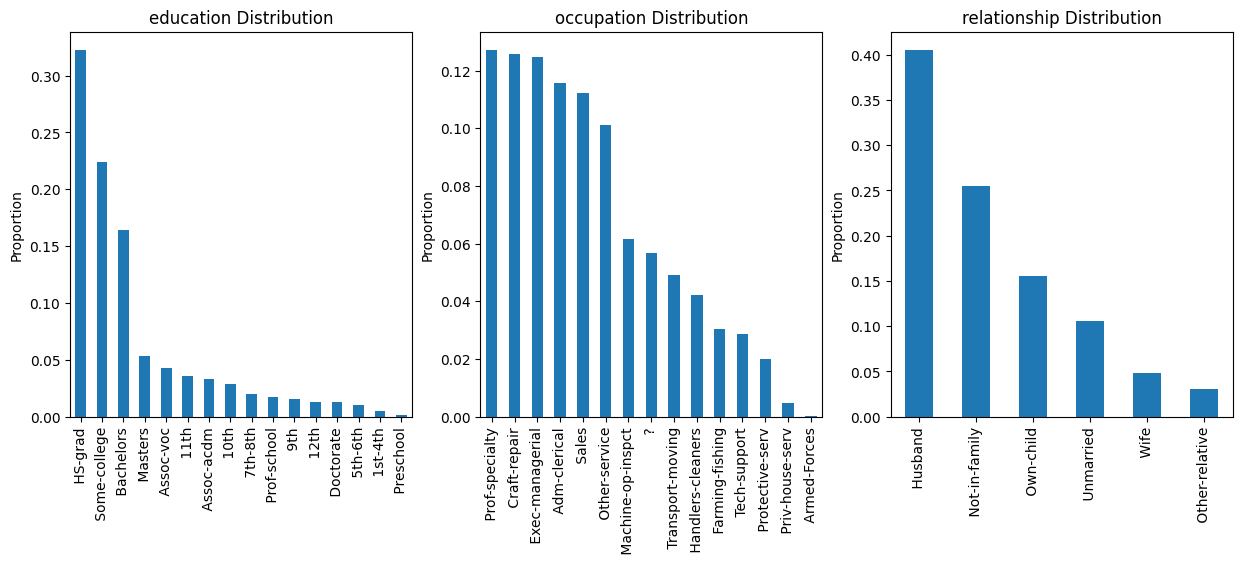

In [9]:
# add your code below
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop that plots and prints info for education, occupation and relationship
for i, var in enumerate(['education', 'occupation', 'relationship']):
    
    data_train[var].value_counts(normalize=True).plot(kind='bar', ax=axs[i])
    axs[i].set_title(str(var + ' Distribution'))
    axs[i].set_ylabel('Proportion')


    var_counts = data_train[var].value_counts()
    highest_count = var_counts.iloc[0]
    highest_val = var_counts.index[0]
    print("Variable: '{}', Highest Value: '{}', Occurrences: {}".format(var, highest_val, highest_count))


plt.show()




# 1.4*
From your histograms, what is the most rare education level, the most rare occupation, and the least rare relationship? How many records have each of these values?

**Answer**:

Variable: 'education', Highest Value: ' HS-grad', Occurrences: 10501

Variable: 'occupation', Highest Value: ' Prof-specialty', Occurrences: 4140

Variable: 'relationship', Highest Value: ' Husband', Occurrences: 13193


# 1.5* 
Train and test a Naive Bayes classifier on this dataset to predict whether a person with 14 particular characteristics makes more than $50,000/yr. Use a 70/30 random split of the *training data* to estimate the accuracy of the model. Use a Categorical model for the categorical features, e.g., 'workclass' and 'education', and a Guassian model for the numerical features, e.g., 'age' and 'hours-per-week'. Add the predicted log probabilities of these models and make a decision based on which class has the largest log probability.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

columns_categorical = ['workclass','education','marital-status','occupation',
                       'relationship','race','sex','native-country']
columns_numerical = ['age','education_num','capital-gain','capital-loss',
                        'hours-per-week']

# we need to first encode the categorical columns
data_train_encoded = pd.DataFrame()

for col in columns_categorical:
  LE = LabelEncoder()  # Removes repeating labels
 
  dt = LE.fit_transform(data_train[col]) #Transform the labels for each cathegory, fit them and and return encoded labels.
  data_train_encoded[col] = dt

# combine with the numerical columns
for col in columns_numerical:
  data_train_encoded[col] = data_train[col] 

# add in the encoded class column
LE = LabelEncoder()
data_train_encoded['class'] = LE.fit_transform(data_train['class']) #0 = <50 k, # 1 = >50k

# add your code below

"""Train gaussian and multinomial"""
X = data_train_encoded
y = data_train_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70)

# Gaussian Bayes
guassian_model = GaussianNB(priors=(0.5, 0.5)) 
# Multinomial Bayes:
categorical_model = CategoricalNB(fit_prior=False) 

guassian_model.fit(X_train.get(columns_numerical), y_train)
categorical_model.fit(X_train.get(columns_categorical), y_train)

"""Find Log probability"""
log_prob_gaussian = guassian_model.predict_log_proba(X_test.get(columns_numerical)) #Getting logaritmic maximum  probability (argmax)of the gaussian model
log_prob_categorical = categorical_model.predict_log_proba(X_test.get(columns_categorical)) #Getting logaritmic maximum  probability (argmax)of the categorical model

prob_class0 = sum(data_train_encoded['class'] == 0)/len(data_train_encoded['class'])
prob_class1 = sum(data_train_encoded['class'] == 1)/len(data_train_encoded['class'])

log_prob_total = log_prob_gaussian + log_prob_categorical + np.log([prob_class0,prob_class1]) #The columns correspond to the classes, log_prob_total has 2 column (1 and 0)

# Make predictions and print
y_pred = np.argmax(log_prob_total, axis=1)

print('log probability of <= 50k = ', sum(log_prob_total[0]))
print('log probability of > 50k = ', sum(log_prob_total[1]))

print('Accuracy score naive Bayes:', accuracy_score(y_test, y_pred))
print('Accuracy score always <=50k:', accuracy_score(y_test, np.zeros(y_test.shape)))

log probability of <= 50k =  -16.52888005366606
log probability of > 50k =  -6.4161602913219316
Accuracy score naive Bayes: 0.8343740403316614
Accuracy score always <=50k: 0.7613880642849831


# 1.6* 
How does the performance of your naive Bayes classifier compare with always choosing "<=50K"? How does it compare with the highest performing algorithm described in the dataset information sheet?

**Answer**: 

From bayes we get abou 0.83 and from <=50k we get 0.76, meaning bayes outperforms. 

According to the information sheet the best algorith achieves 0.84, meaning we are very close with bayes but not quite there with any of the methods. 

# 1.7*
Apply feature selection (use SelectKBest with the chi2 option) to determine which are the best five features to use for predicting whether someone makes more than $50K each year. What are those features? Use the 70/30 random split of the *training data* you created in 1.6 to estimate the accuracy of the model.  What is the accuracy on the 30% you held out?

**Answer**: 


In [11]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Find 5 best 
K = 5
est = SelectKBest(f_classif,k=K)
X_new = est.fit_transform(X.drop(columns="class"), y)
sup = est.get_support()
featurenames = data_train.columns

print("Features selected are:")
for i in np.where(sup)[0]:
  print(featurenames[i])

"""Train"""
gaussian_model = GaussianNB()
categorical_model = CategoricalNB()

numerical_selected = ['capital-gain', 'capital-loss', 'hours-per-week']
categorical_selected = ['sex', 'marital-status']

gaussian_model.fit(X_train.get(numerical_selected), y_train)
categorical_model.fit(X_train.get(categorical_selected), y_train)

# Predict class probabilities
prob_gaussian = gaussian_model.predict_proba(X_test.get(numerical_selected))
prob_categorical = np.exp(categorical_model.predict_log_proba(X_test.get(categorical_selected)))

# Combine predictions using product rule
prob_combined = prob_gaussian * prob_categorical

# Predict class labels based on highest joint probability
y_pred = np.argmax(prob_combined, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy)



Features selected are:
marital-status
sex
capital-gain
capital-loss
native-country

Accuracy: 0.8014126317944519


# 1.8*
For each feature selected, describe how it might make sense to be a good predictor of the class.

**Answer**:

Marital status: If people are married they tend do be older thus having more time spent increasing their salary

Sex: Men often make more money than women

Capital gain: If you gain more capital you are more likely to exceed 50k

Capital loss: If you lose capital you are less likely to exceed 50k 

NAtive-country: If a country is poor, most people living there also are. 


# 1.9*

Now load in the test data, i.e., "adult.test". Train a Naive Bayes classifer on all the training data with all the features (except for 'fnlwgt'), and another Naive Bayes classifier on the features you selected in 1.7. Make sure you keep the categorical and numerical models separate, as before. Compute their accuracies.

In [14]:
# read in the test data

data_test = pd.read_csv('adult.test',sep=',',header=None,names=columnNames)
data_test = data_test.drop('fnlwgt',axis=1)

all_categorical_selected = [['workclass','education','marital-status','occupation',
                       'relationship','race','sex','native-country'],['age','education_num','capital-gain','capital-loss',
                        'hours-per-week']]
sel_categorical_numerical = [['capital-gain', 'capital-loss', 'hours-per-week'],['sex', 'marital-status']]

# we need to first encode the categorical columns
data_train_encoded = pd.DataFrame()
data_test_encoded = pd.DataFrame()
for col in columns_categorical:
  LE = LabelEncoder()
  dt = LE.fit_transform(data_train[col])
  data_train_encoded[col] = dt
  dt = LE.transform(data_test[col])
  data_test_encoded[col] = dt

# combine with the numerical columns
for col in columns_numerical:
  data_train_encoded[col] = data_train[col]
  data_test_encoded[col] = data_test[col]

# add in the encoded class column
LE = LabelEncoder()
data_train_encoded['class'] = LE.fit_transform(data_train['class'])
data_test_encoded['class'] = LE.fit_transform(data_test['class'])

# add your code below

X_train, y_train = data_train_encoded, data_train_encoded['class']
X_test, y_test= data_test_encoded,data_test_encoded['class']

for i, variant in enumerate([all_categorical_selected, sel_categorical_numerical]):
  gaussian_model = GaussianNB()
  categorical_model = CategoricalNB()

  gaussian_model.fit(X_train.get(variant[0]), y_train)
  categorical_model.fit(X_train.get(variant[1]), y_train)

  # Predict class probabilities
  prob_gaussian = gaussian_model.predict_proba(X_test.get(variant[0]))
  prob_categorical = np.exp(categorical_model.predict_log_proba(X_test.get(variant[1])))

  # Combine predictions using product rule
  prob_combined = prob_gaussian * prob_categorical

  # Predict class labels based on highest joint probability
  y_pred = np.argmax(prob_combined, axis=1)

  # Compute accuracy
  if i == 0:
    print('Accuracy All features:', accuracy_score(y_test, y_pred))
    y_pred_all_features = y_pred
  else:
    print('Accuracy Selected features:', accuracy_score(y_test, y_pred))
    y_pred_five_features = y_pred






Accuracy All features: 0.8444812972176157
Accuracy Selected features: 0.7995209139487747


# 1.10*

Plot the confusion tables for both.

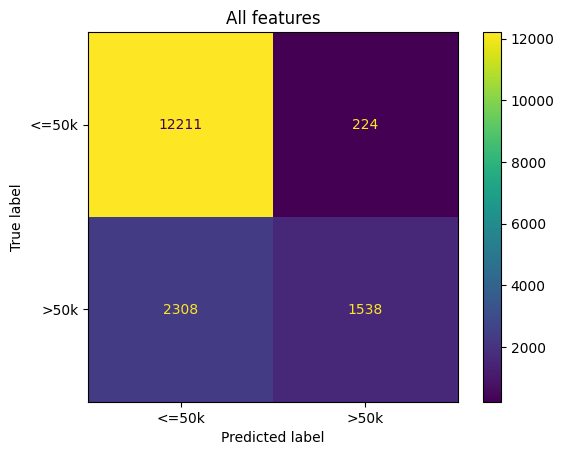

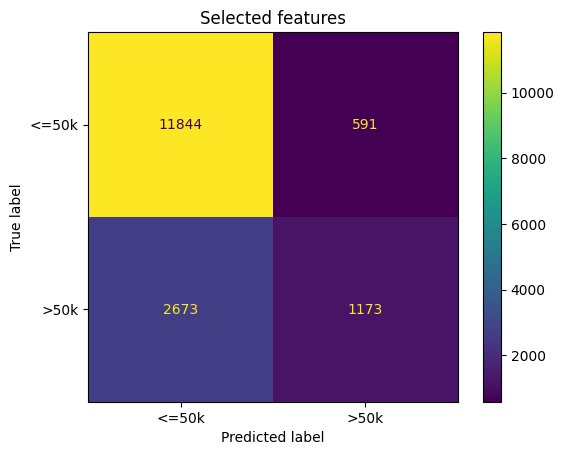

In [15]:
from sklearn import metrics

"""All features"""
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_all_features)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["<=50k", ">50k"])
cm_display.plot()
plt.title("All features")

plt.show()

"""Selected features"""
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_five_features)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["<=50k", ">50k"])
cm_display.plot()
plt.title("Selected features")
plt.show()

# 1.11*

From your tables in 1.10, which class shows the largest confusion?

**Answer**: 

We can find the greatest confusion under selected features, where it predicts <=50k about 1/4 of the time when it was actually >50k.